In [1]:
# importing libraries
import numpy as np
import pandas as pd
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# import time libraries
from datetime import date, timedelta

# keras and sklearn libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# assingn today date
today = date.today()

In [2]:
data = pd.read_csv(r"C:\Users\ARAVINTHAN\OneDrive\Desktop\Cape_stone_project-1\multi_variate_nflx\NFLX.csv")
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
1,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200


In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
1,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
2,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
3,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800
4,2002-06-07,1.177857,1.177857,1.103571,1.118571,1.118571,1369200
...,...,...,...,...,...,...,...
5004,2022-04-18,340.000000,342.359985,331.619995,337.859985,337.859985,5105000
5005,2022-04-19,333.220001,351.679993,333.220001,348.609985,348.609985,20906900
5006,2022-04-20,245.199997,248.699997,212.509995,226.190002,226.190002,133387500
5007,2022-04-21,220.000000,227.679993,211.520004,218.220001,218.220001,53501600


In [5]:
df.shape

(5009, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5.009000e+03
mean,116.182215,117.934200,114.313015,116.170853,116.170853,1.653975e+07
std,169.188583,171.589314,166.567556,169.115875,169.115875,1.926471e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.951429,4.028571,3.881429,3.957143,3.957143,6.119900e+06
50%,25.578571,26.049999,25.085714,25.492857,25.492857,1.058260e+07
75%,149.800003,152.559998,148.000000,150.179993,150.179993,1.988140e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5009 non-null   object 
 1   Open       5009 non-null   float64
 2   High       5009 non-null   float64
 3   Low        5009 non-null   float64
 4   Close      5009 non-null   float64
 5   Adj Close  5009 non-null   float64
 6   Volume     5009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 274.1+ KB


In [9]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

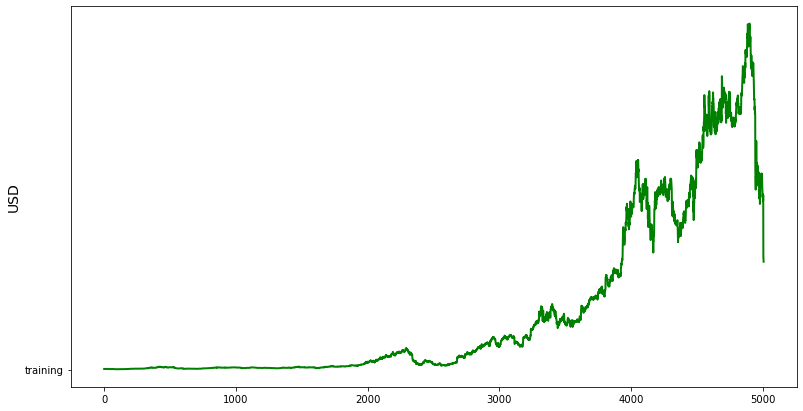

In [10]:
# Data Visualization

def line_plot(line1, line2, label1=None, label2=None, title='', lw = 2):
    fig, ax = plt.subplots(1, figsize=(13,7))
    ax.plot(line1, label=label1, linewidth=lw, color='g')
    ax.plot(line2, label=label2, linewidth=lw, color='r')
    ax.set_ylabel('USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    # ax.legend(loc='best', fontsize=16);
    plt.ion()
    
line_plot(df['Close'], 'training', 'test', title='')

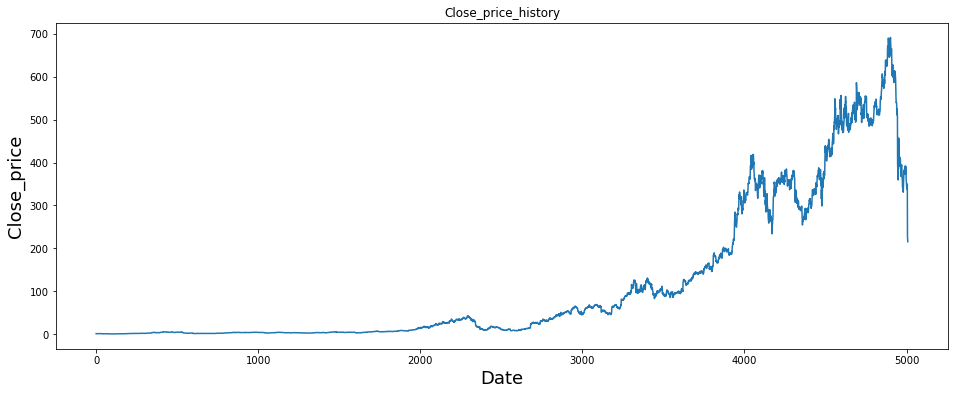

In [11]:
plt.figure(figsize=(16,6))
plt.title('Close_price_history')
plt.plot(df.index,df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close_price', fontsize = 18)
plt.show()

# A - predict to next day
# Target and feature variable: "Close"
# Standart scaler to "Close" variable
# Split into Train, Valid and Test
# Split to X, y array with function
# Standart scaler
# reshape the feautures 2ndim to 3 ndim
# LSTM
# prediction train and valid
# calculation RMSE
# prediction Test
# Visulaization

In [32]:
# choose close variable as array
close_df = df['Close']

In [33]:
# scaler
scaler = StandardScaler()
data_scale = scaler.fit_transform(close_df.values.reshape(-1,1))

In [34]:
# describe the data sizes
total_size = data_scale.shape[0]
print('Total_data_size: ',total_size)

train_size = round(len(data_scale) * 0.7)
print('Train_data_size: ',train_size)
train_array = data_scale[0:train_size]

valid_size = round(len(data_scale) * 0.2)
print('Valid_data_size: ',valid_size)
valid_size = train_size + valid_size
valid_array = data_scale[train_size:valid_size]

test_size = total_size - valid_size
print('Test_data_size: ',test_size)
test_array = data_scale[valid_size:total_size]

Total_data_size:  5009
Train_data_size:  3506
Valid_data_size:  1002
Test_data_size:  501


In [35]:
# function to split target data into x and y:
def lstm_dataset(dataset, back_day=15):
    x,y=[],[]
    first = back_day
    predict_day=1
    last=len(dataset)-predict_day
    
    for i in range(first, last):
        x.append(dataset[i-back_day:i,0])
        y.append(dataset[i+predict_day,0])
    return np.array(x), np.array(y)

In [36]:
# lstm_dataset, function split dataset into x_train, y_train, x_test
x_train, y_train = lstm_dataset(train_array)
x_valid, y_valid = lstm_dataset(valid_array)
x_test = test_array

In [37]:
# Check the shapes
print("x_train shape: ",x_train.shape, "  x_train ndim: ",x_train.ndim)
print("y_train shape: ",y_train.shape, "  y_train ndim: ",y_train.ndim)

print("x_valid shape: ",x_valid.shape, "  x_valid ndim: ",x_valid.ndim)
print("y_valid shape: ",y_valid.shape, "  y_valid ndim: ",y_valid.ndim)

print("x_test shape: ",x_test.shape, "  x_test ndim: ",x_test.ndim)

x_train shape:  (3490, 15)   x_train ndim:  2
y_train shape:  (3490,)   y_train ndim:  1
x_valid shape:  (986, 15)   x_valid ndim:  2
y_valid shape:  (986,)   y_valid ndim:  1
x_test shape:  (501, 1)   x_test ndim:  2


In [38]:
# convert x datasets 2ndim to 3 ndim
x_train_reshape = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_valid_reshape = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], 1))
x_test_reshape = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [39]:
print("x_train shape: ",x_train_reshape.shape, "  x_train ndim: ",x_train_reshape.ndim)

print("x_valid shape: ",x_valid_reshape.shape, "  x_valid ndim: ",x_valid_reshape.ndim)

print("x_test shape: ",x_test_reshape.shape, "  x_test ndim: ",x_test_reshape.ndim)

x_train shape:  (3490, 15, 1)   x_train ndim:  3
x_valid shape:  (986, 15, 1)   x_valid ndim:  3
x_test shape:  (501, 1, 1)   x_test ndim:  3


# Apply LSTM

In [40]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train_reshape.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_reshape, y_train, batch_size=1, epochs=10, verbose=2)

Epoch 1/10
3490/3490 - 20s - loss: 7.3368e-04 - 20s/epoch - 6ms/step
Epoch 2/10
3490/3490 - 17s - loss: 3.4968e-04 - 17s/epoch - 5ms/step
Epoch 3/10
3490/3490 - 17s - loss: 2.4323e-04 - 17s/epoch - 5ms/step
Epoch 4/10
3490/3490 - 17s - loss: 2.3853e-04 - 17s/epoch - 5ms/step
Epoch 5/10
3490/3490 - 17s - loss: 2.2040e-04 - 17s/epoch - 5ms/step
Epoch 6/10
3490/3490 - 17s - loss: 2.0605e-04 - 17s/epoch - 5ms/step
Epoch 7/10
3490/3490 - 17s - loss: 1.9600e-04 - 17s/epoch - 5ms/step
Epoch 8/10
3490/3490 - 17s - loss: 1.8921e-04 - 17s/epoch - 5ms/step
Epoch 9/10
3490/3490 - 17s - loss: 1.8791e-04 - 17s/epoch - 5ms/step
Epoch 10/10
3490/3490 - 17s - loss: 1.7200e-04 - 17s/epoch - 5ms/step


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 15, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Get the models predicted prive values for train and vald dataset
y_train_pred = model.predict(x_train_reshape)
y_valid_pred = model.predict(x_valid_reshape)

31/31 [==============================] - 0s 7ms/step


In [43]:
# RMSE Score
y_train_rmse = mean_squared_error(y_train,y_train_pred, squared=False)
print('Train Score: %.2f RMSE' % (y_train_rmse))

y_valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)
print(' Val Score: %.2f RMSE' % (y_valid_rmse))

Train Score: 0.02 RMSE
 Val Score: 0.32 RMSE


In [63]:
# MAE Error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_valid, y_valid_pred))

0.014709556313433448
0.2344981949999382


In [68]:
# r2
from sklearn.metrics import r2_score
r_squared = r2_score(y_train, y_train_pred)
r_sqr = r2_score(y_valid, y_valid_pred)
print(r_sqr)
print(r_squared)

0.7065432385887352
0.9908196356377375


In [44]:
# Prediction 
y_test_pred = model.predict(x_test_reshape)

16/16 [==============================] - 1s 2ms/step


In [52]:
# create dataframe of prediction outputs
# 16 is sum of back_day and predicted_day variables in lstm_database function.
# To get convenient index number as Dates, it needs.
df_pred_train = pd.DataFrame(scaler.inverse_transform(y_train_pred), columns = ['Close']).set_index(df[16:train_size].index)
df_pred_valid = pd.DataFrame(scaler.inverse_transform(y_valid_pred), columns = ['Close']).set_index(df[train_size+16:valid_size].index)
df_pred_test = pd.DataFrame(scaler.inverse_transform(y_test_pred), columns = ['Close']).set_index(df[valid_size:].index)

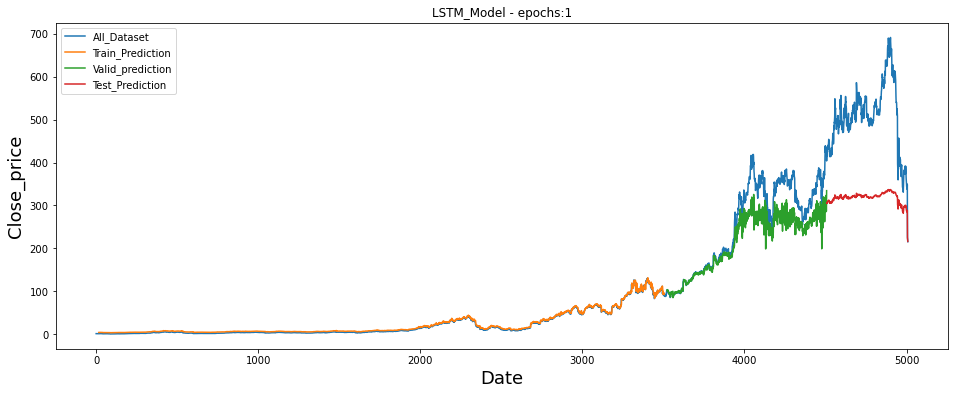

In [53]:
plt.figure(figsize=(16,6))
plt.title('LSTM_Model - epochs:1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_price', fontsize=18)

plt.plot(df['Close'])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)

plt.legend(['All_Dataset', 'Train_Prediction', 'Valid_prediction', 'Test_Prediction'], loc='upper left')
plt.show()

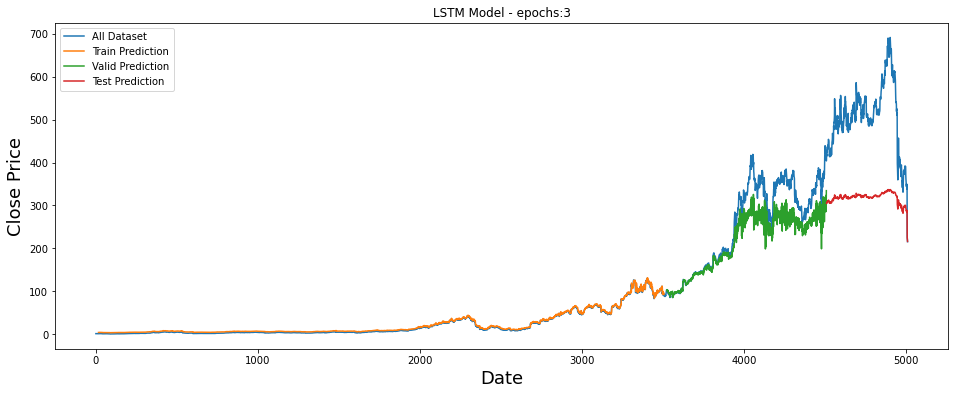

In [54]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

plt.plot(df["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()


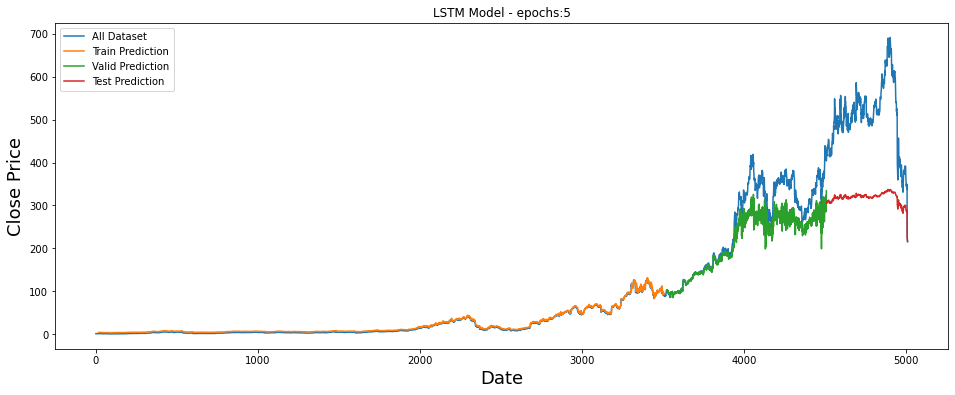

In [55]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:5')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

plt.plot(df["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

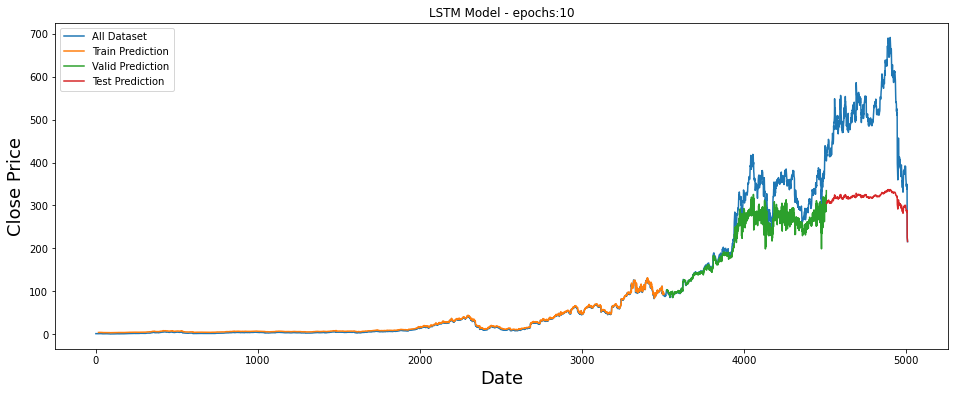

In [56]:
plt.figure(figsize=(16,6))

plt.title('LSTM Model - epochs:10')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

plt.plot(df["Close"])
plt.plot(df_pred_train)
plt.plot(df_pred_valid)
plt.plot(df_pred_test)


plt.legend(['All Dataset', "Train Prediction",'Valid Prediction', "Test Prediction"], loc='upper left')
plt.show()

In [57]:
date_buttons = [
{'count': 28, 'label': "4WTD", 'step': "day", 'stepmode': "todate"},
{'count': 6, 'label': "6MTD", 'step': "month", 'stepmode': "todate"},
{'count': 1, 'label': "YTD", 'step': "year", 'stepmode': "todate"}]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Close"], mode='lines',name='Raw Data',line = dict(color='royalblue', width=2, dash='dot')))

fig.add_trace(go.Scatter(x=df_pred_train.index, y=df_pred_train["Close"], mode='lines', name='Train_pred'))

fig.add_trace(go.Scatter(x=df_pred_valid.index, y=df_pred_valid["Close"], mode='lines',name='Valid_pred'))

fig.add_trace(go.Scatter(x=df_pred_test.index, y=df_pred_test["Close"], mode='lines',name='Test_pred'))


fig.update_layout(title="Stock Close Price Prediction - Epochs:10",
                   xaxis_title="Date",
                   yaxis_title="Stock Close Price")

fig.update_layout( {"xaxis":
                            {"rangeselector":
                                 {"buttons": date_buttons} } } )

fig.update_layout(autosize=False, width=1400, height=600)

fig.show()